In [1]:
#lets load dependencies
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re
import math
from pandas.api.types import CategoricalDtype

In [3]:
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(15,10)})
plt.rcParams['figure.figsize'] = (20,3)

In [8]:
daily_activity = pd.read_csv(r"C:\Users\User\Downloads\dailyActivity_merged.csv",parse_dates={'Date': [1]}) 
sleep_activity = pd.read_csv(r"C:\Users\User\Downloads\sleepDay_merged.csv",parse_dates={'Date': [1]}) 

In [9]:
daily_activity.head()

,Date,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,2016-04-12,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,2016-04-13,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,2016-04-14,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,2016-04-15,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,2016-04-16,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [10]:
daily_activity.insert(1,'Day',daily_activity['Date'].dt.day_name())

In [11]:
daily_activity.head()

,Date,Day,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,2016-04-12,Tuesday,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,2016-04-13,Wednesday,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,2016-04-14,Thursday,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,2016-04-15,Friday,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,2016-04-16,Saturday,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [12]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [13]:
#finding the null values
daily_activity.isnull().sum()

Date                        0
Day                         0
Id                          0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [14]:
#lets find the unique values
daily_activity.Date.unique()

array(['2016-04-12T00:00:00.000000000', '2016-04-13T00:00:00.000000000',
       '2016-04-14T00:00:00.000000000', '2016-04-15T00:00:00.000000000',
       '2016-04-16T00:00:00.000000000', '2016-04-17T00:00:00.000000000',
       '2016-04-18T00:00:00.000000000', '2016-04-19T00:00:00.000000000',
       '2016-04-20T00:00:00.000000000', '2016-04-21T00:00:00.000000000',
       '2016-04-22T00:00:00.000000000', '2016-04-23T00:00:00.000000000',
       '2016-04-24T00:00:00.000000000', '2016-04-25T00:00:00.000000000',
       '2016-04-26T00:00:00.000000000', '2016-04-27T00:00:00.000000000',
       '2016-04-28T00:00:00.000000000', '2016-04-29T00:00:00.000000000',
       '2016-04-30T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-04T00:00:00.000000000', '2016-05-05T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-05-07T00:00:00.000000000',
       '2016-05-08T00:00:00.000000000', '2016-05-09

In [16]:
daily_activity.Id.unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391], dtype=int64)

In [17]:
daily_activity.groupby('Id')['Day'].count()

Id
1503960366    31
1624580081    31
1644430081    30
1844505072    31
1927972279    31
2022484408    31
2026352035    31
2320127002    31
2347167796    18
2873212765    31
3372868164    20
3977333714    30
4020332650    31
4057192912     4
4319703577    31
4388161847    31
4445114986    31
4558609924    31
4702921684    31
5553957443    31
5577150313    30
6117666160    28
6290855005    29
6775888955    26
6962181067    31
7007744171    26
7086361926    31
8053475328    31
8253242879    19
8378563200    31
8583815059    31
8792009665    29
8877689391    31
Name: Day, dtype: int64

In [18]:
#sleepday
sleep_activity

,Date,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,1503960366,1,327,346
1,2016-04-13,1503960366,2,384,407
2,2016-04-15,1503960366,1,412,442
3,2016-04-16,1503960366,2,340,367
4,2016-04-17,1503960366,1,700,712
...,...,...,...,...,...
408,2016-04-30,8792009665,1,343,360
409,2016-05-01,8792009665,1,503,527
410,2016-05-02,8792009665,1,415,423
411,2016-05-03,8792009665,1,516,545


In [19]:
sleep_activity.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [20]:
## Merging two datasets
merged_df = pd.merge(daily_activity,sleep_activity,on=['Id','Date'],how='left')
merged_df

,Date,Day,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,Tuesday,1503960366,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1.0,327.0,346.0
1,2016-04-13,Wednesday,1503960366,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2.0,384.0,407.0
2,2016-04-14,Thursday,1503960366,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,NaN,NaN,NaN
3,2016-04-15,Friday,1503960366,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,1.0,412.0,442.0
4,2016-04-16,Saturday,1503960366,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2016-05-08,Sunday,8877689391,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,NaN,NaN,NaN
939,2016-05-09,Monday,8877689391,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,NaN,NaN,NaN
940,2016-05-10,Tuesday,8877689391,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,NaN,NaN,NaN
941,2016-05-11,Wednesday,8877689391,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,NaN,NaN,NaN


<AxesSubplot:>

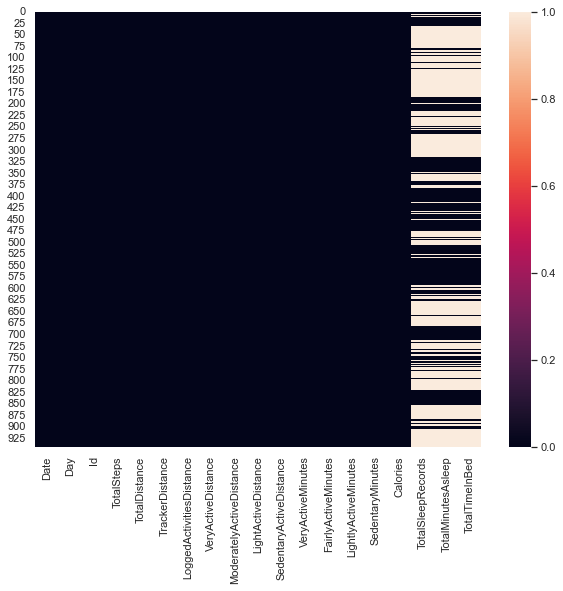

In [22]:
missing_values = merged_df.isna()
plt.figure(figsize=(10,8))
sns.heatmap(data=missing_values)

In [23]:
merged_df.dropna(inplace=True)

<AxesSubplot:>

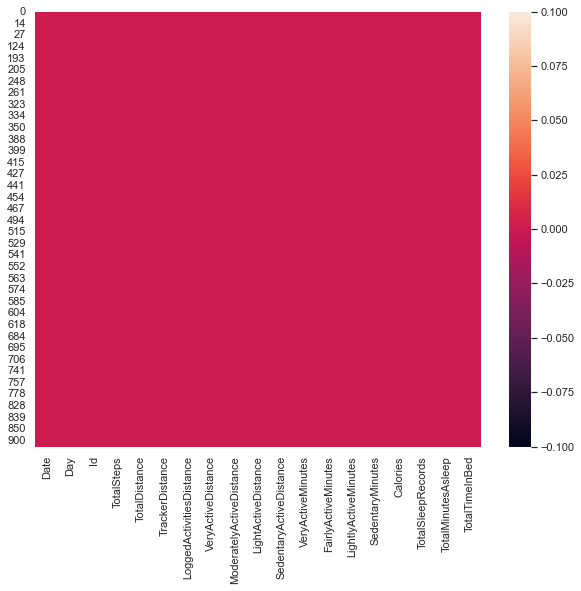

In [24]:
missing_value = merged_df.isna()
plt.figure(figsize=(10,8))
sns.heatmap(data=missing_value)

In [26]:
#lets see how many columns are present in merged data
merged_df.columns

Index(['Date', 'Day', 'Id', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

In [27]:
corr = merged_df.corr()

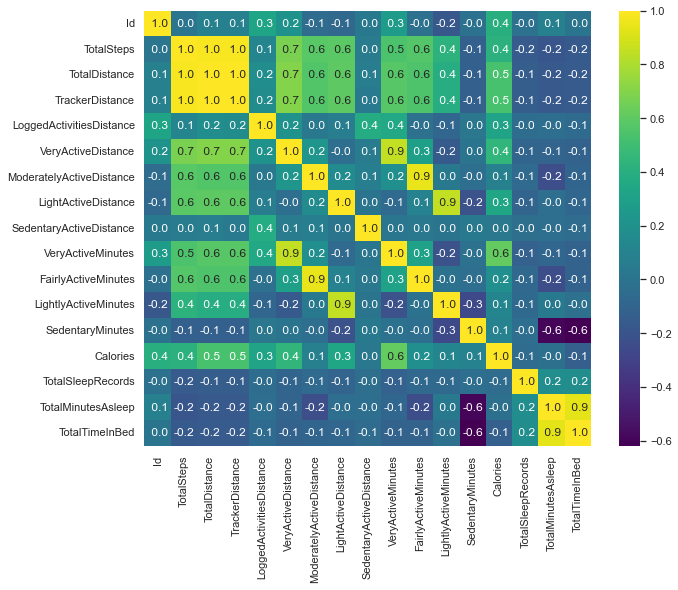

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=' .1f',cbar=True,cmap='viridis')

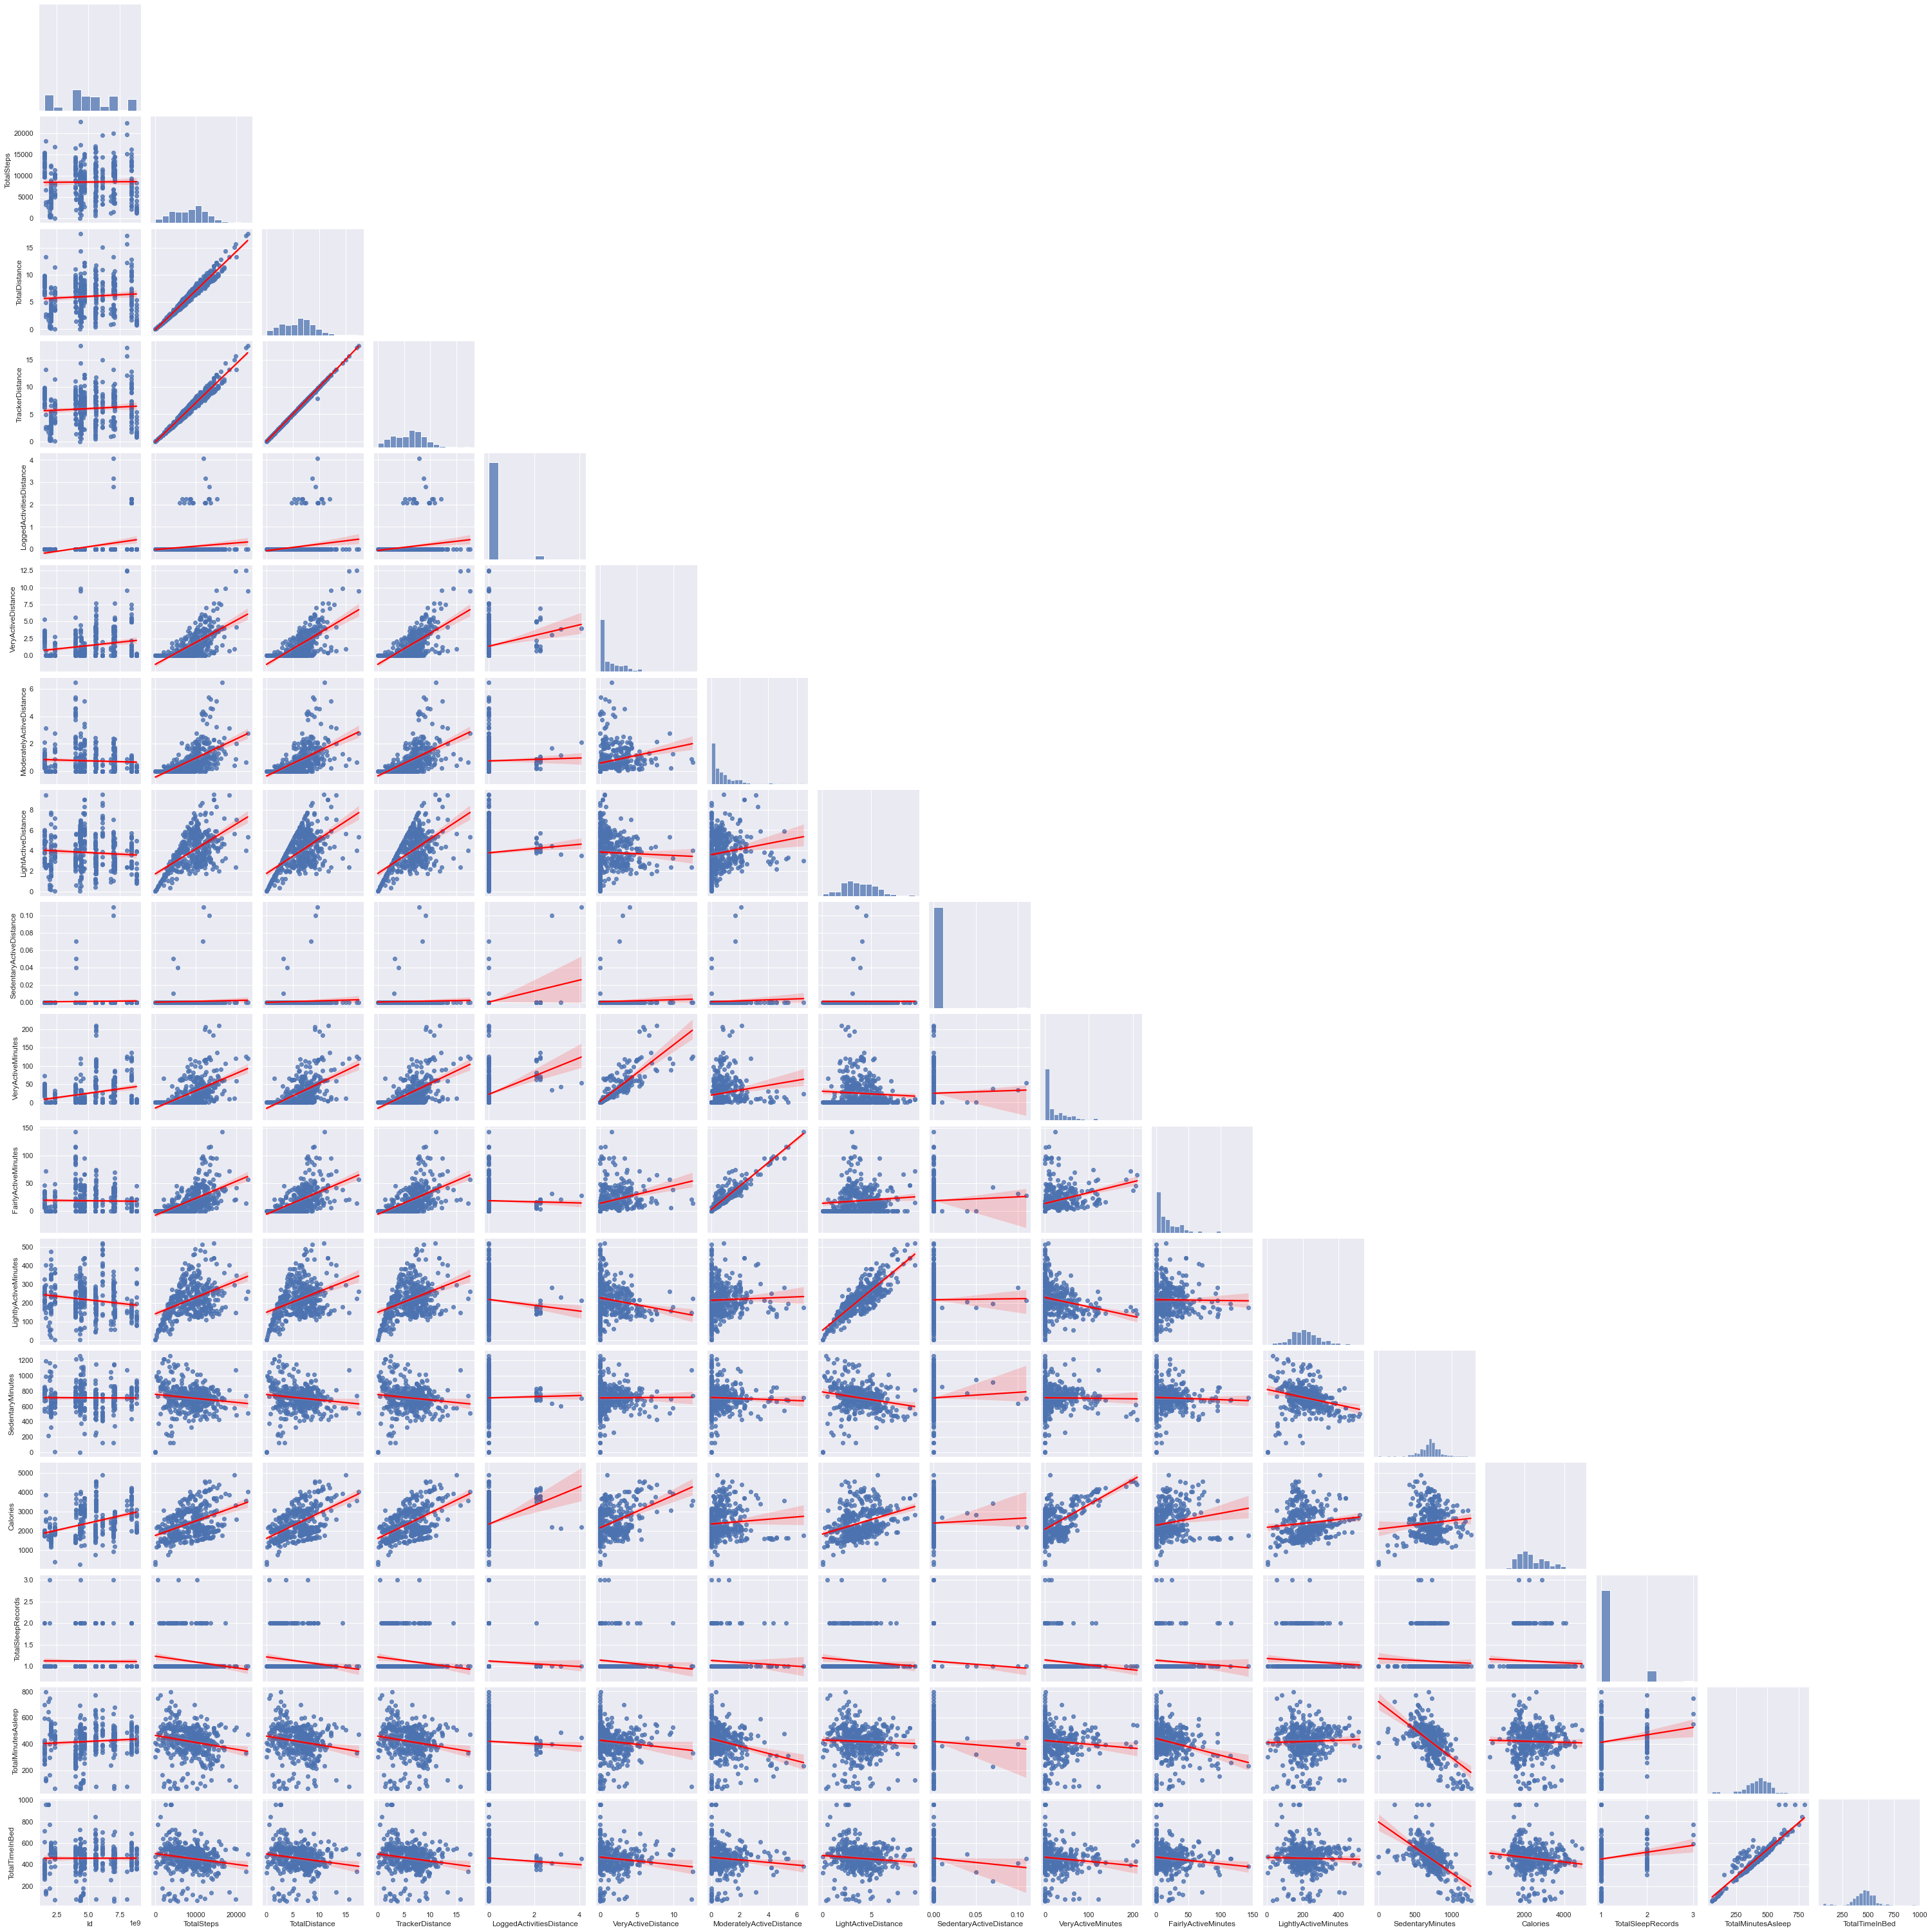

In [32]:
sns.pairplot(data=merged_df,kind='reg',plot_kws={'line_kws':{'color':'red'}},corner=True)

Text(0.5, 1.0, 'Number of Users in each Day')

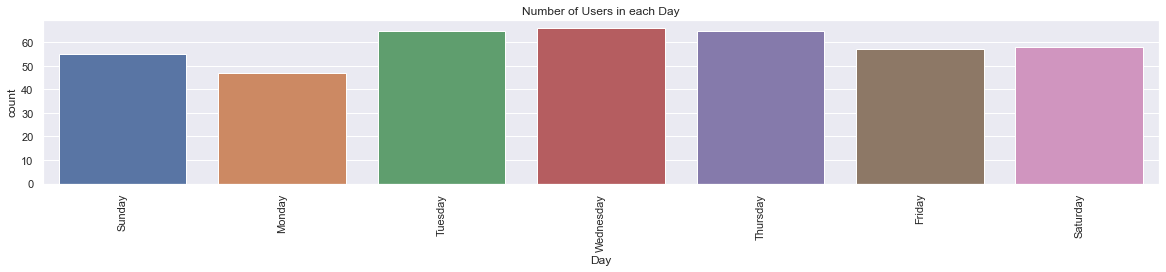

In [35]:
sns.countplot(data=merged_df,x='Day',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation=90)
plt.title("Number of Users in each Day")

from the above plot, we can see most of the user applied there smart device on Tuesday, Wednesday,Thursday

Text(0.5, 1.0, 'Number of users in each day')

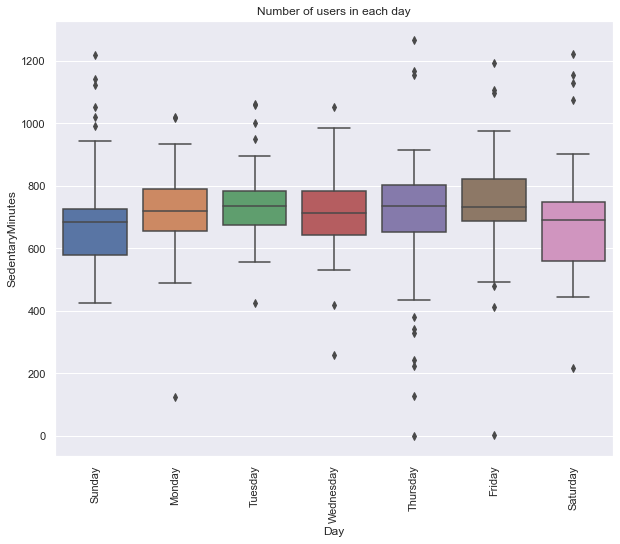

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(data=merged_df,x='Day',y='SedentaryMinutes',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation=90)
plt.title('Number of users in each day')

Text(0.5, 1.0, 'Number of user each day')

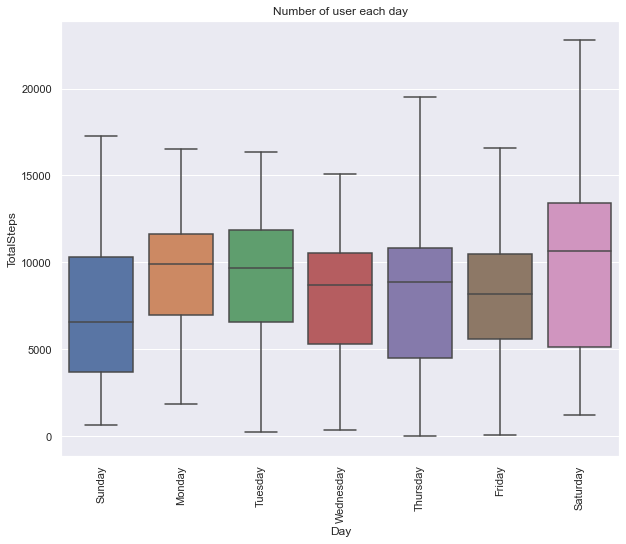

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(data=merged_df,x='Day',y='TotalSteps',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation=90)
plt.title("Number of user each day")

From the sedentary of day plot, we can observe that users have a longer sedentary on a weekday as the box located higher than on weekend, one of the possible reasons is that they are working and sitting in the office on a weekday.

From the Total Steps of day plot, we can observe that generally users walk most on Saturday and walk the least on Sunday.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

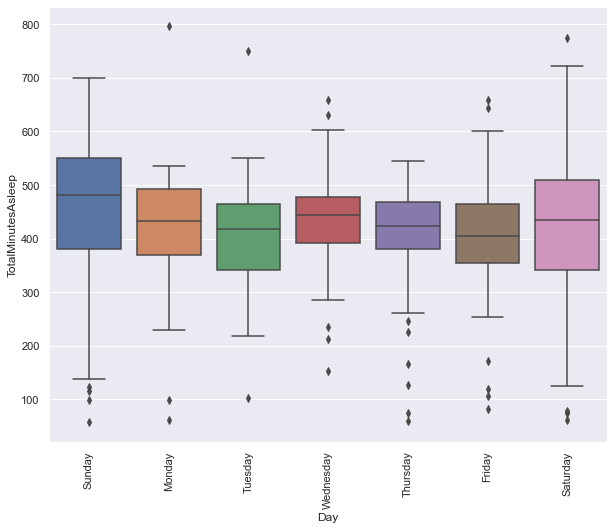

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(data=merged_df,x='Day',y='TotalMinutesAsleep',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation=90)

The box shows that users tend to have a longer sleep time on the weekend when compares with the sleeping time on weekday.

Text(0.5, 1.0, 'Calories burned Vs Total Distance')

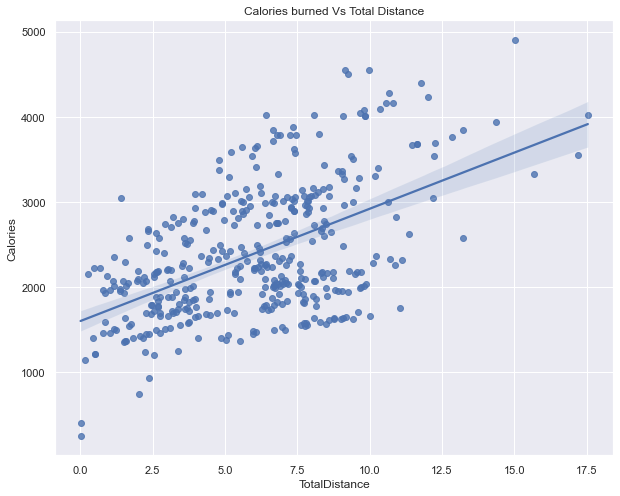

In [42]:
plt.figure(figsize=(10,8))
sns.regplot(x='TotalDistance',y='Calories',data=merged_df)
plt.title("Calories burned Vs Total Distance")

Text(0.5, 1.0, 'Total Steps  Vs TotalMinutesAsleep')

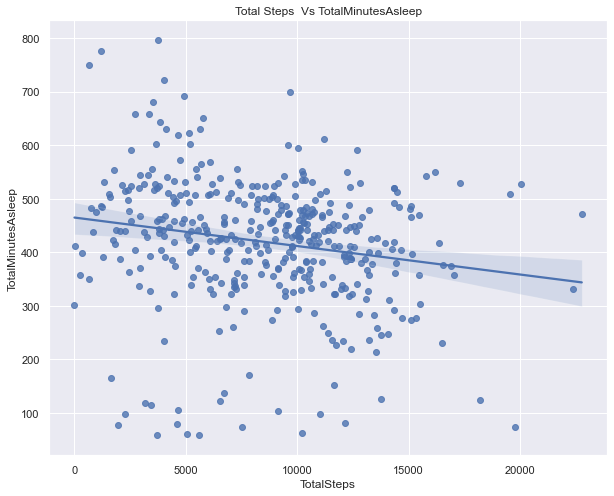

In [43]:
plt.figure(figsize=(10,8))
sns.regplot(x='TotalSteps',y='TotalMinutesAsleep',data=merged_df)
plt.title("Total Steps  Vs TotalMinutesAsleep")

As general, walk more will burn more calories, while walk less, did not sleep more.

In [64]:
merged_df['TotalMinutes'] = merged_df['LightlyActiveMinutes']+merged_df['FairlyActiveMinutes']+merged_df['VeryActiveMinutes']+merged_df['SedentaryMinutes']
                            

In [65]:
activities_means = merged_df['TotalMinutes'].mean()

In [66]:
lig_means = (merged_df['LightlyActiveMinutes'].mean()/activities_means) *100
fair_means = (merged_df['FairlyActiveMinutes'].mean()/activities_means) *100
veryact_mean = (merged_df['VeryActiveMinutes'].mean()/activities_means) *100
seden_mean = (merged_df['SedentaryMinutes'].mean()/activities_means) *100


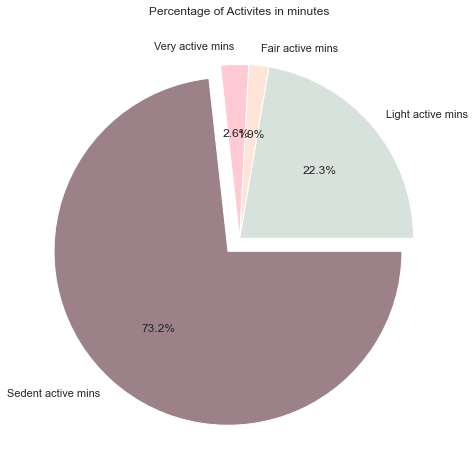

In [68]:
plt.figure(figsize=(10,8))
plt.pie([lig_means,fair_means,veryact_mean,seden_mean],
       labels=['Light active mins','Fair active mins','Very active mins','Sedent active mins'],
       colors =['#d8e2dc', '#ffe5d9', '#ffcad4', '#9d8189'],
       explode=[0,0,0,0.1],
       autopct="%1.1f%%")
plt.title("Percentage of Activites in minutes")
plt.show()

Finding
Almost 3/4 of the total time user spends is sedentary minutes, and Light Active minutes only got 22.3% of the total time of usage. One of the possible reasons is that users wear smart devices all day, not only when they getting exercise.

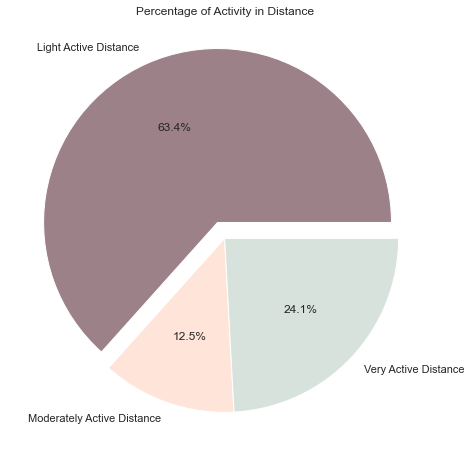

In [69]:
activities_means = merged_df["TotalDistance"].mean()

lightly_pcr = (merged_df['LightActiveDistance'].mean()/activities_means) * 100
moderately_pcr = (merged_df['ModeratelyActiveDistance'].mean()/activities_means) * 100
very_pcr = (merged_df['VeryActiveDistance'].mean()/activities_means) * 100

plt.figure(figsize=(10,8))
plt.pie([lightly_pcr, moderately_pcr, very_pcr], 
        labels = ["Light Active Distance", "Moderately Active Distance", "Very Active Distance"], 
        colors = ['#9d8189', '#ffe5d9', '#d8e2dc'],  
        explode = [0.1, 0, 0], 
        autopct = "%1.1f%%")


plt.title("Percentage of Activity in Distance")
plt.show()


Almost 3/4 of the total time user spends is sedentary minutes, and Light Active minutes only got 22.3% of the total time of usage. One of the possible reasons is that users wear smart devices all day, not only when they getting exercise.

## From the above finding, we can conclude that,

1.Users tend to use smart devices on weekdays, especially on Wednesdays, but the total steps on Wednesdays are not the highest.

2.There is a positive relationship between Total Distance and Calories Burned.

3.Users tend to walk more on Saturday and less on Sunday, one of the possible reasons is that they hand out with friends on Saturday night, and get more rest on Sunday. Which also explains in the Sleep data.

4.Almost 3/4 of the total time user spends is sedentary minutes, and Light Active minutes only got 22.3% of the total time of usage. One of the possible reasons is that users wear smart devices all day, not only when they getting exercise.